In [11]:
import math
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [13]:
float_columns = ["Open", "High", "Low", "Close", "Volume"]
data_types = {column: float for column in float_columns}

In [14]:
train_df = pd.read_csv("Google_Stock_Price_Train.csv", index_col="Date", parse_dates=True, dtype=data_types, engine="c", low_memory=False, thousands=",")
test_df = pd.read_csv("Google_Stock_Price_Test.csv", index_col="Date", parse_dates=True, dtype=data_types, engine="c", low_memory=False, thousands=",")

In [15]:
train_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [16]:
test_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
train_df = scaler.fit_transform(train_df)
test_df = scaler.fit_transform(test_df)

In [21]:
x_train = []
y_train = []

for i in range(50,1258):
    x_train.append(train_df[i-50:i,0])
    y_train.append(train_df[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_test = []
y_test = []

for i in range(50,1258):
    x_test.append(train_df[i-50:i,0])
    y_test.append(train_df[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1])) 
print("X size:", x_train.size)
print("Y size:",y_train.size)

X size: 60400
Y size: 1208


## Simple RNN Model

In [27]:
#Initializing model
simple_rnn =  Sequential()

#Adding the four layers:
simple_rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
simple_rnn.add(Dropout(0.2))

simple_rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
simple_rnn.add(Dropout(0.2))

simple_rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
simple_rnn.add(Dropout(0.2))

simple_rnn.add(SimpleRNN(units = 50))
simple_rnn.add(Dropout(0.2))

#Output layer:
simple_rnn.add(Dense(units = 1))

In [29]:
# Compiling the model
simple_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
# Fitting the model to the training data
simple_rnn_history = simple_rnn.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
38/38 [==============================] - 6s 43ms/step - loss: 0.4476
Epoch 2/20
38/38 [==============================] - 2s 43ms/step - loss: 0.2899
Epoch 3/20
38/38 [==============================] - 2s 42ms/step - loss: 0.2288
Epoch 4/20
38/38 [==============================] - 2s 42ms/step - loss: 0.1754
Epoch 5/20
38/38 [==============================] - 2s 42ms/step - loss: 0.1341
Epoch 6/20
38/38 [==============================] - 2s 42ms/step - loss: 0.1059
Epoch 7/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0924
Epoch 8/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0719
Epoch 9/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0566
Epoch 10/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0547
Epoch 11/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0545
Epoch 12/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0481
Epoch 13/20
38/38 [==================

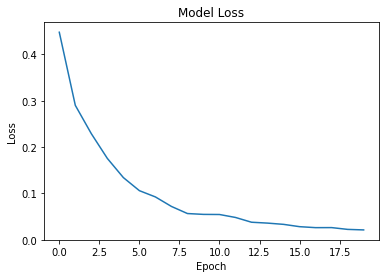

In [31]:
plt.plot(simple_rnn_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## LSTM

In [32]:
#Initializing model:
lstm_rnn = Sequential()

In [33]:
#Adding the four requried layers
lstm_rnn.add(LSTM(units = 50, activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
lstm_rnn.add(Dropout(0.2))

lstm_rnn.add(LSTM(units = 50, activation='tanh', return_sequences = True))
lstm_rnn.add(Dropout(0.2))

lstm_rnn.add(LSTM(units = 50, activation='tanh', return_sequences = True))
lstm_rnn.add(Dropout(0.2))

lstm_rnn.add(LSTM(units = 50))
lstm_rnn.add(Dropout(0.2))

#Output layer:
lstm_rnn.add(Dense(units = 1))

In [34]:
#Compiling the model
lstm_rnn.compile(optimizer="adam", loss = "mean_squared_error") 

In [35]:
#Fit the model to the training data:
lstm_rnn_history = lstm_rnn.fit(x_train, y_train, epochs= 20, batch_size=32) 

Epoch 1/20
38/38 [==============================] - 12s 109ms/step - loss: 0.0367
Epoch 2/20
38/38 [==============================] - 4s 97ms/step - loss: 0.0060
Epoch 3/20
38/38 [==============================] - 4s 96ms/step - loss: 0.0055
Epoch 4/20
38/38 [==============================] - 4s 97ms/step - loss: 0.0051
Epoch 5/20
38/38 [==============================] - 4s 100ms/step - loss: 0.0047
Epoch 6/20
38/38 [==============================] - 4s 97ms/step - loss: 0.0047
Epoch 7/20
38/38 [==============================] - 4s 98ms/step - loss: 0.0047
Epoch 8/20
38/38 [==============================] - 4s 97ms/step - loss: 0.0046
Epoch 9/20
38/38 [==============================] - 4s 98ms/step - loss: 0.0041
Epoch 10/20
38/38 [==============================] - 4s 98ms/step - loss: 0.0040
Epoch 11/20
38/38 [==============================] - 5s 137ms/step - loss: 0.0034
Epoch 12/20
38/38 [==============================] - 4s 98ms/step - loss: 0.0039
Epoch 13/20
38/38 [==============

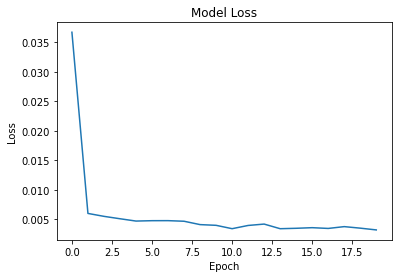

In [36]:
plt.plot(lstm_rnn_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

The LSTM reaches a constant and lower value for mean square error in fewer epochs compared to simple RNN model.